<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n250.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.343433,59.515181,84.784868,-4667.970282,-4472.326799,-56.254229,-4416.072570
1,0.0,1.0,57.182373,61.302364,65.380770,-1081.318276,-887.452769,322.072878,-1209.525647
2,0.0,2.0,80.785142,46.054460,81.532793,-2168.179145,-1949.806749,-696.955782,-1252.850967
3,0.0,3.0,91.744037,89.013808,66.512866,-6300.245382,-6042.974670,-335.119922,-5707.854748
4,0.0,4.0,37.278227,27.990745,49.221885,-1224.087505,-1099.596648,1219.938357,-2319.535005
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.047836,50.677549,21.336552,-570.048220,-436.986284,-398.459168,-38.527116
59996,999.0,56.0,80.586907,61.507429,92.950975,2039.894342,2284.939653,197.476347,2087.463306
59997,999.0,57.0,64.784844,85.086670,80.148414,7459.149382,7699.169310,-733.164311,8432.333621
59998,999.0,58.0,40.941725,65.428691,94.407376,-6154.079181,-5943.301387,-222.045006,-5721.256381


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.343433,59.515181,84.784868,-4667.970282,-4472.326799,-56.254229,-4416.072570
1,0.0,1.0,57.182373,61.302364,65.380770,-1081.318276,-887.452769,322.072878,-1209.525647
2,0.0,2.0,80.785142,46.054460,81.532793,-2168.179145,-1949.806749,-696.955782,-1252.850967
3,0.0,3.0,91.744037,89.013808,66.512866,-6300.245382,-6042.974670,-335.119922,-5707.854748
4,0.0,4.0,37.278227,27.990745,49.221885,-1224.087505,-1099.596648,1219.938357,-2319.535005
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.047836,50.677549,21.336552,-570.048220,-436.986284,-398.459168,-38.527116
59996,999.0,56.0,80.586907,61.507429,92.950975,2039.894342,2284.939653,197.476347,2087.463306
59997,999.0,57.0,64.784844,85.086670,80.148414,7459.149382,7699.169310,-733.164311,8432.333621
59998,999.0,58.0,40.941725,65.428691,94.407376,-6154.079181,-5943.301387,-222.045006,-5721.256381


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    41.343433  59.515181  84.784868 -4667.970282 -4472.326799   
      1.0    57.182373  61.302364  65.380770 -1081.318276  -887.452769   
      2.0    80.785142  46.054460  81.532793 -2168.179145 -1949.806749   
      3.0    91.744037  89.013808  66.512866 -6300.245382 -6042.974670   
      4.0    37.278227  27.990745  49.221885 -1224.087505 -1099.596648   
...                ...        ...        ...          ...          ...   
999.0 55.0   51.047836  50.677549  21.336552  -570.048220  -436.986284   
      56.0   80.586907  61.507429  92.950975  2039.894342  2284.939653   
      57.0   64.784844  85.086670  80.148414  7459.149382  7699.169310   
      58.0   40.941725  65.428691  94.407376 -6154.079181 -5943.301387   
      59.0   43.830281  67.222321  56.031648 -6183.769101 -6006.684850   

                   y_hat        e_hat  
rep   index                            
0.0   0.0     -56.254229 -4416.072570  
      1.0     322.072878 -1209.525647  
      2.0    -696.955782 -1252.850967  
      3.0    -335.119922 -5707.854748  
      4.0    1219.938357 -2319.535005  
...                  ...          ...  
999.0 55.0   -398.459168   -38.527116  
      56.0    197.476347  2087.463306  
      57.0   -733.164311  8432.333621  
      58.0   -222.045006 -5721.256381  
      59.0   -610.632616 -5396.052234  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    41.343433  59.515181  84.784868 -4667.970282 -4472.326799   
      1.0    57.182373  61.302364  65.380770 -1081.318276  -887.452769   
      2.0    80.785142  46.054460  81.532793 -2168.179145 -1949.806749   
      3.0    91.744037  89.013808  66.512866 -6300.245382 -6042.974670   
      4.0    37.278227  27.990745  49.221885 -1224.087505 -1099.596648   
...                ...        ...        ...          ...          ...   
999.0 55.0   51.047836  50.677549  21.336552  -570.048220  -436.986284   
      56.0   80.586907  61.507429  92.950975  2039.894342  2284.939653   
      57.0   64.784844  85.086670  80.148414  7459.149382  7699.169310   
      58.0   40.941725  65.428691  94.407376 -6154.079181 -5943.301387   
      59.0   43.830281  67.222321  56.031648 -6183.769101 -6006.684850   

                   y_hat        e_hat  
rep   index                            
0.0   0.0     -56.254229 -4416.072570  
      1.0     322.072878 -1209.525647  
      2.0    -696.955782 -1252.850967  
      3.0    -335.119922 -5707.854748  
      4.0    1219.938357 -2319.535005  
...                  ...          ...  
999.0 55.0   -398.459168   -38.527116  
      56.0    197.476347  2087.463306  
      57.0   -733.164311  8432.333621  
      58.0   -222.045006 -5721.256381  
      59.0   -610.632616 -5396.052234  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.343433,59.515181,84.784868,-4667.970282,-4472.326799,-56.254229,-4416.072570
1,0.0,1.0,57.182373,61.302364,65.380770,-1081.318276,-887.452769,322.072878,-1209.525647
2,0.0,2.0,80.785142,46.054460,81.532793,-2168.179145,-1949.806749,-696.955782,-1252.850967
3,0.0,3.0,91.744037,89.013808,66.512866,-6300.245382,-6042.974670,-335.119922,-5707.854748
4,0.0,4.0,37.278227,27.990745,49.221885,-1224.087505,-1099.596648,1219.938357,-2319.535005
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.047836,50.677549,21.336552,-570.048220,-436.986284,-398.459168,-38.527116
59996,999.0,56.0,80.586907,61.507429,92.950975,2039.894342,2284.939653,197.476347,2087.463306
59997,999.0,57.0,64.784844,85.086670,80.148414,7459.149382,7699.169310,-733.164311,8432.333621
59998,999.0,58.0,40.941725,65.428691,94.407376,-6154.079181,-5943.301387,-222.045006,-5721.256381


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    41.343433  59.515181  84.784868 -4667.970282 -4472.326799   
      1.0    57.182373  61.302364  65.380770 -1081.318276  -887.452769   
      2.0    80.785142  46.054460  81.532793 -2168.179145 -1949.806749   
      3.0    91.744037  89.013808  66.512866 -6300.245382 -6042.974670   
      4.0    37.278227  27.990745  49.221885 -1224.087505 -1099.596648   
...                ...        ...        ...          ...          ...   
999.0 55.0   51.047836  50.677549  21.336552  -570.048220  -436.986284   
      56.0   80.586907  61.507429  92.950975  2039.894342  2284.939653   
      57.0   64.784844  85.086670  80.148414  7459.149382  7699.169310   
      58.0   40.941725  65.428691  94.407376 -6154.079181 -5943.301387   
      59.0   43.830281  67.222321  56.031648 -6183.769101 -6006.684850   

                   y_hat        e_hat  
rep   index                            
0.0   0.0     -56.254229 -4416.072570  
      1.0     322.072878 -1209.525647  
      2.0    -696.955782 -1252.850967  
      3.0    -335.119922 -5707.854748  
      4.0    1219.938357 -2319.535005  
...                  ...          ...  
999.0 55.0   -398.459168   -38.527116  
      56.0    197.476347  2087.463306  
      57.0   -733.164311  8432.333621  
      58.0   -222.045006 -5721.256381  
      59.0   -610.632616 -5396.052234  

[60000 rows x 7 columns]

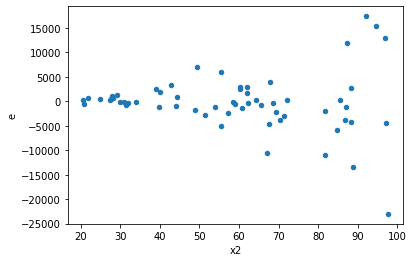

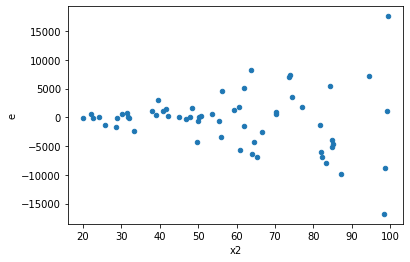

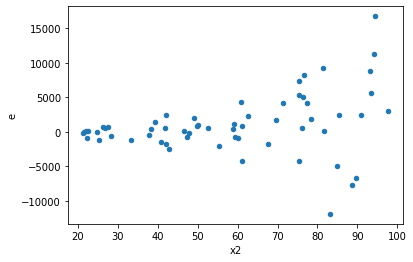

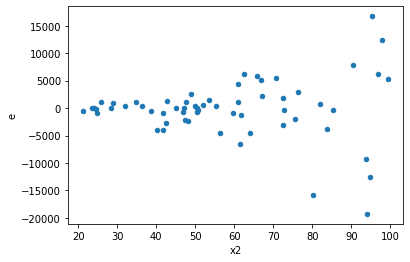

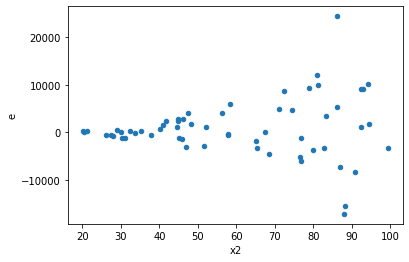

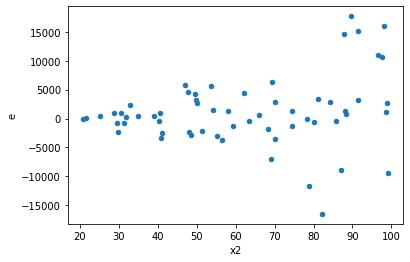

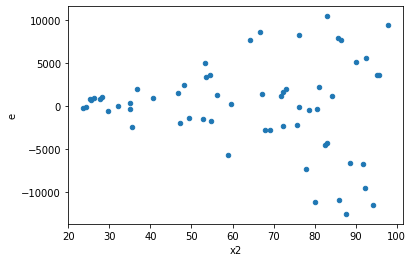

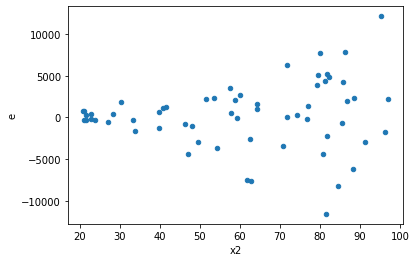

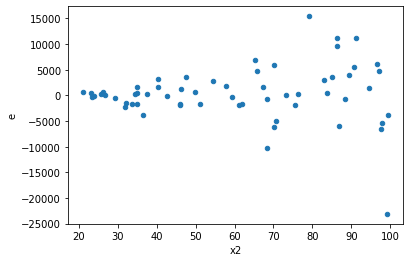

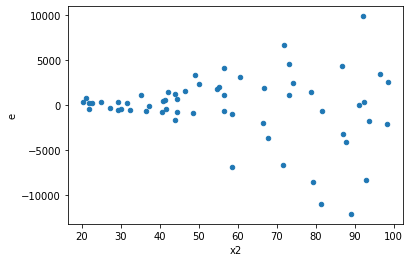

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # Correlation between two columns of DataFrame.
    corr_x1 = new_table['x1'].corr(new_table['Y'])
    corr_x2 = new_table['x2'].corr(new_table['Y'])
    corr_x3 = new_table['x3'].corr(new_table['Y'])

    # Correlation between all the columns of DataFrame.
    all_corr = new_table.corr()

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return corr_x1, corr_x2, corr_x3, df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_corr_x1=[]
list_corr_x2=[]
list_corr_x3=[]
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    corr_x1, corr_x2, corr_x3, df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_corr_x1.append(corr_x1)
    list_corr_x2.append(corr_x2)
    list_corr_x3.append(corr_x3)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "corr_x1":list_corr_x1, "corr_x2":list_corr_x2, "corr_x3":list_corr_x3, 
                     "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,corr_x1,corr_x2,corr_x3,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,,,,
0.0,-0.11215278965154564,0.02334572991838793,-0.20263544151177043,21.0,21.0,294624458.9613177,322118714.0578683,14029736.14101513,15338986.383708015,1.0933196625747912,0.8399369070289149,0.5800315464855426,0.41996845351445744,Reject005=1 : Homoscedasticity
2.0,0.047309336094623816,0.1449894751157322,-0.01615248591635823,21.0,21.0,77826432.98091042,909988856.8060308,3706020.6181385913,43332802.70504908,11.692542262976854,4.600955847422483e-07,0.9999997699522076,2.3004779237112416e-07,Reject005=0 : Heteroscedasticity
3.0,0.19273234962085795,0.10276880788866256,-0.14334412760640264,21.0,21.0,347860204.08595085,587143807.0994236,16564771.623140518,27959228.909496363,1.68787288744978,0.2385388759704934,0.8807305620147533,0.1192694379852467,Reject005=1 : Homoscedasticity
5.0,-0.18288724353106967,0.19731275667334888,0.05719574310492566,21.0,21.0,173325826.15498006,869505632.1266898,8253610.769284765,41405030.101270944,5.016595918886418,0.0005007255789024612,0.9997496372105488,0.0002503627894512306,Reject005=0 : Heteroscedasticity
7.0,0.001870633460633944,0.0012685694451528612,-0.1210626295079399,21.0,21.0,447823656.4369663,609063733.9672066,21324936.02080792,29003034.950819362,1.3600526127027766,0.4870922276931391,0.7564538861534305,0.24354611384656955,Reject005=1 : Homoscedasticity
8.0,0.10211628008682642,0.2921028872994194,-0.04187224863390529,21.0,21.0,25113085.337859828,1247981870.9824767,1195861.2065647538,59427708.1420227,49.69448612915164,3.8036240823657863e-13,0.9999999999998098,1.9018120411828932e-13,Reject005=0 : Heteroscedasticity
10.0,-0.13005657509825702,-0.06111664990524415,0.24162325489681213,21.0,21.0,713227910.128431,1006288849.099532,33963233.81563957,47918516.62378724,1.4108938178237158,0.4368657979637338,0.7815671010181331,0.2184328989818669,Reject005=1 : Homoscedasticity
12.0,0.10648617360102246,0.295621967745543,0.019274940418767414,21.0,21.0,32490828.350660138,880670604.3906325,1547182.3024123874,41936695.44717298,27.105206271933643,1.617799227915384e-10,0.99999999991911,8.08899613957692e-11,Reject005=0 : Heteroscedasticity
13.0,-0.21714178859787348,0.03434571670990533,0.21982031450195744,21.0,21.0,214517458.21165696,737592203.8785954,10215117.05769795,35123438.27993311,3.4383784426106643,0.006621522567113125,0.9966892387164434,0.0033107612835565625,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "corr_x1":list_corr_x1, "corr_x2":list_corr_x2, "corr_x3":list_corr_x3, 
                     "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,corr_x1,corr_x2,corr_x3,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,,,,
0.0,-0.11215278965154564,0.02334572991838793,-0.20263544151177043,21.0,21.0,294624458.9613177,322118714.0578683,14029736.14101513,15338986.383708015,1.0933196625747912,0.8399369070289149,Reject005=1 : Homoscedasticity
1.0,0.11397216734741444,-0.1575779050185177,-0.1451013680649199,21.0,21.0,703996417.0854442,167854161.75633565,33523638.908830676,7993055.321730269,0.238430420500227,0.001792005486541547,Reject005=0 : Heteroscedasticity
2.0,0.047309336094623816,0.1449894751157322,-0.01615248591635823,21.0,21.0,77826432.98091042,909988856.8060308,3706020.6181385913,43332802.70504908,11.692542262976854,4.600955847422483e-07,Reject005=0 : Heteroscedasticity
3.0,0.19273234962085795,0.10276880788866256,-0.14334412760640264,21.0,21.0,347860204.08595085,587143807.0994236,16564771.623140518,27959228.909496363,1.68787288744978,0.2385388759704934,Reject005=1 : Homoscedasticity
4.0,-0.20293626895179656,-0.22013996104679007,-0.1078617128102667,21.0,21.0,919006921.8075076,99695178.77009857,43762234.37178608,4747389.465242789,0.10848142315839969,3.7499107455279313e-06,Reject005=0 : Heteroscedasticity
5.0,-0.18288724353106967,0.19731275667334888,0.05719574310492566,21.0,21.0,173325826.15498006,869505632.1266898,8253610.769284765,41405030.101270944,5.016595918886418,0.0005007255789024612,Reject005=0 : Heteroscedasticity
6.0,-0.28529106649519215,0.07389165694463673,0.10606818543545608,21.0,21.0,428173747.24777025,299489767.10765,20389226.05941763,14261417.481316665,0.6994585002763959,0.4195418219840603,Reject005=1 : Homoscedasticity
7.0,0.001870633460633944,0.0012685694451528612,-0.1210626295079399,21.0,21.0,447823656.4369663,609063733.9672066,21324936.02080792,29003034.950819362,1.3600526127027766,0.4870922276931391,Reject005=1 : Homoscedasticity
8.0,0.10211628008682642,0.2921028872994194,-0.04187224863390529,21.0,21.0,25113085.337859828,1247981870.9824767,1195861.2065647538,59427708.1420227,49.69448612915164,3.8036240823657863e-13,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    662
Reject005=1 : Homoscedasticity      338
Name: Result_test, dtype: int64